In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pxb
from scipy import stats

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df.describe(include='O')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [5]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
for col in ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Policy Inception', 'Total Claim Amount']:
    df[col] = np.where(df[col] >0, df[col], df[col].mean())
    xt, lambda_value = stats.boxcox(df[col])

In [7]:
df[df.duplicated()]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


In [8]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
categorical_values = df.select_dtypes(include = object)
categorical_values = categorical_values.drop(columns=['Customer','Effective To Date'])
categorical_values

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


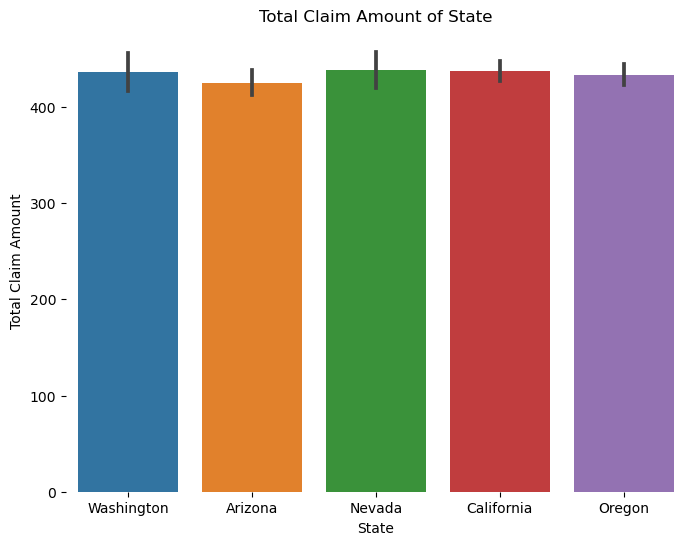

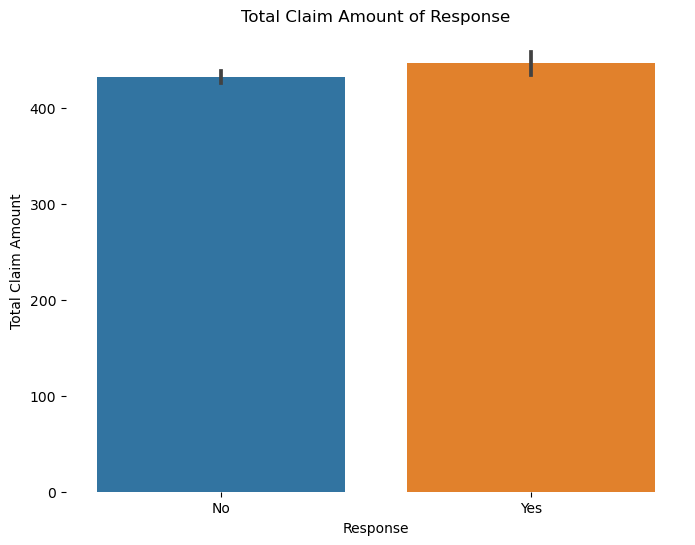

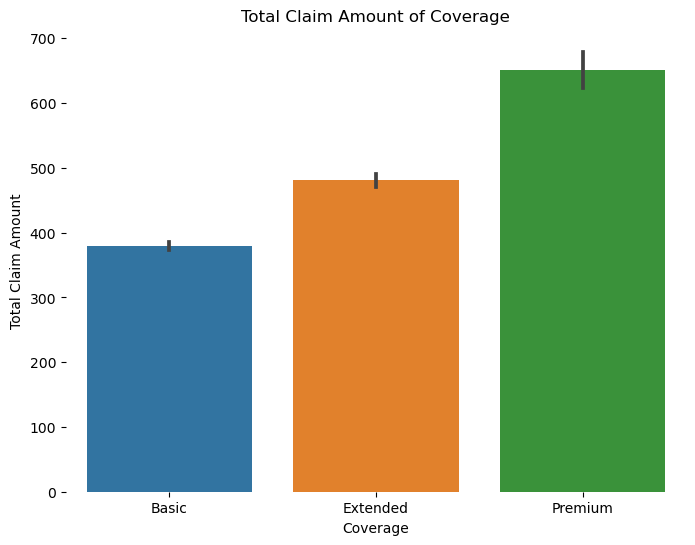

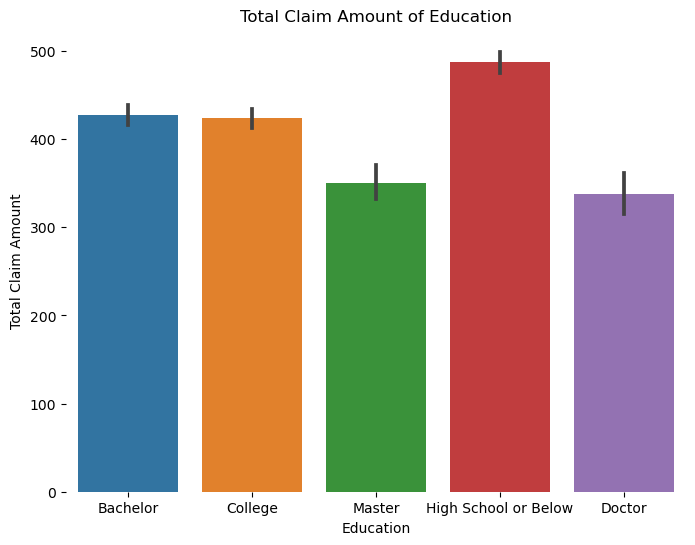

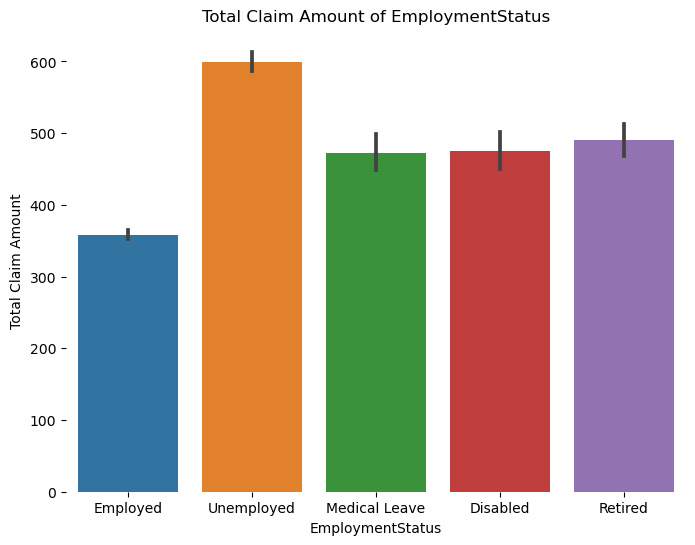

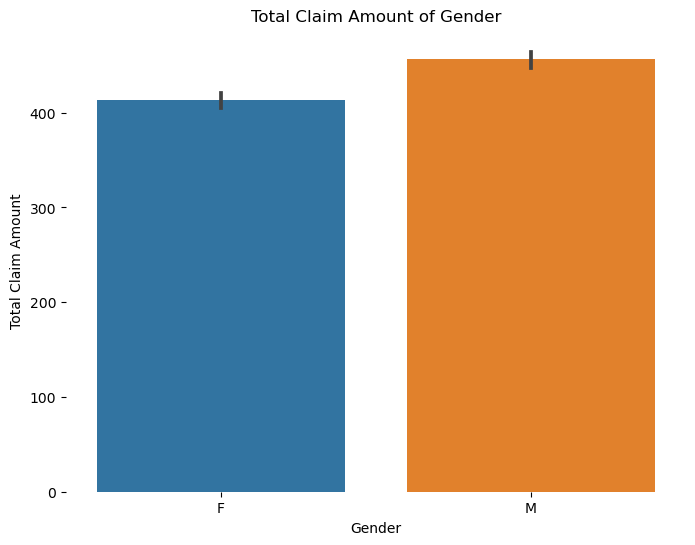

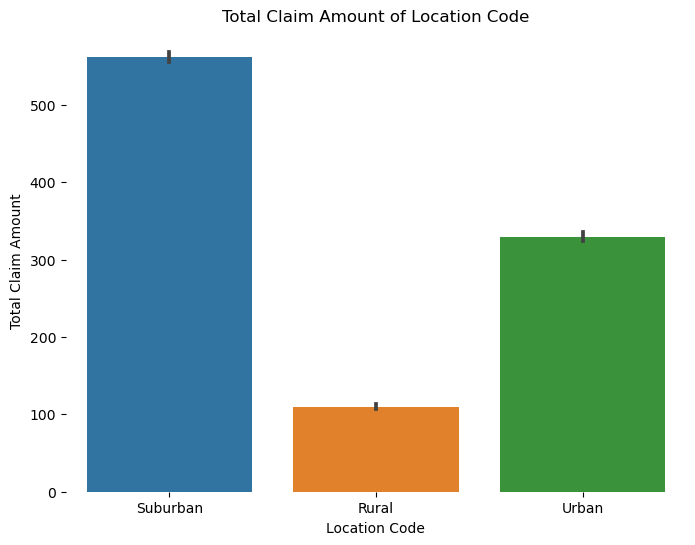

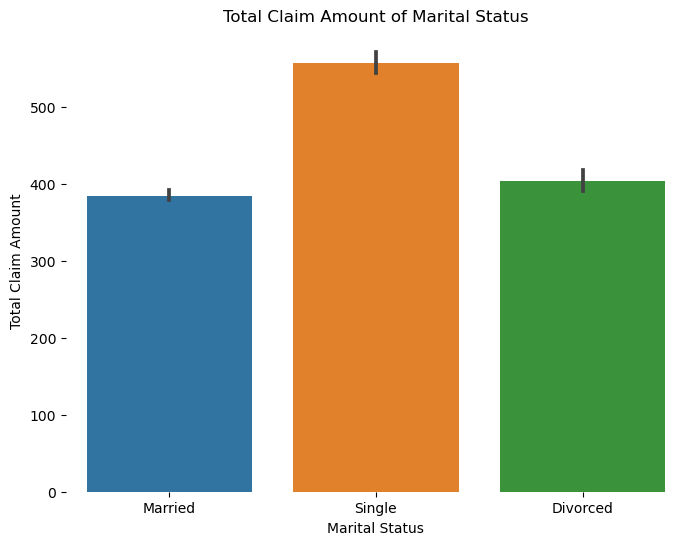

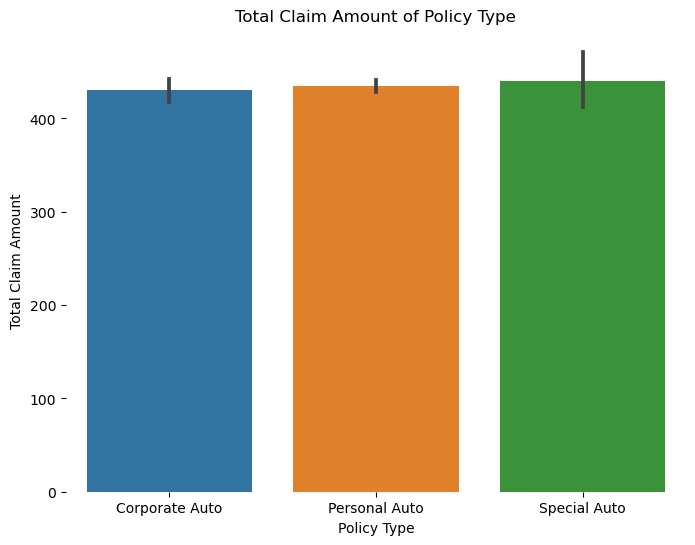

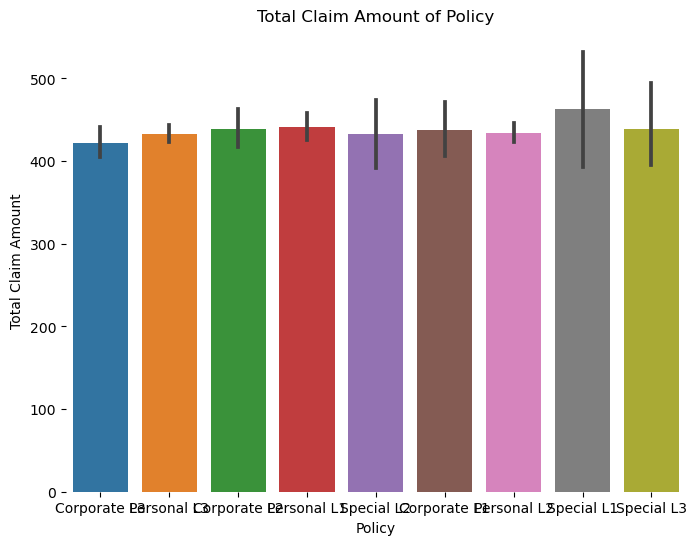

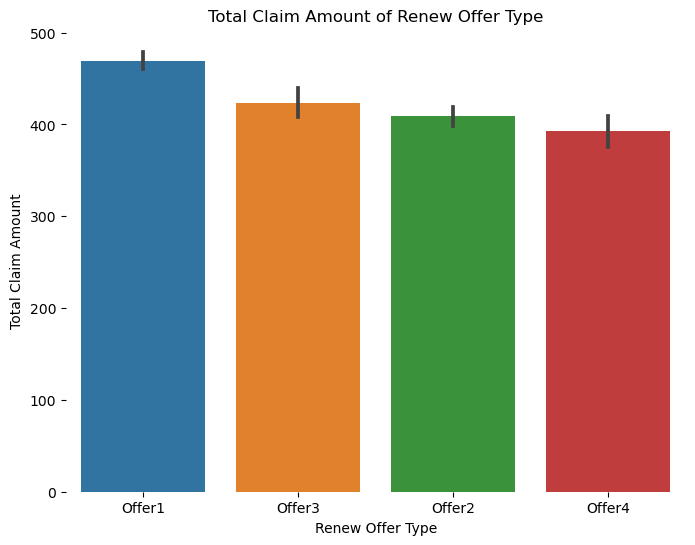

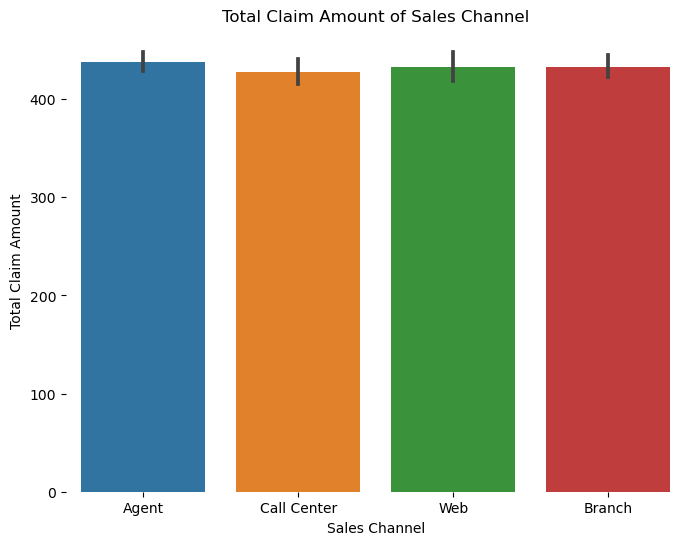

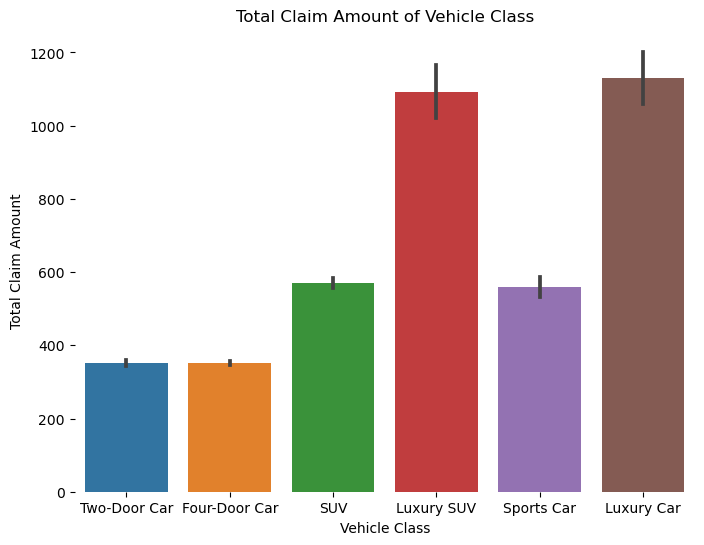

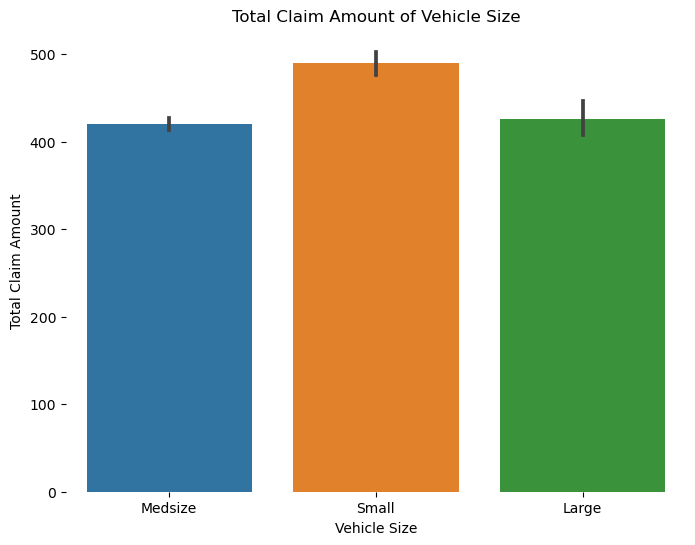

In [10]:
for col in categorical_values.columns:
    plt.figure(figsize =(8,6))
    sns.barplot(y= "Total Claim Amount", x=col, data = df)
    sns.despine(bottom =True, left =True)
    plt.title("Total Claim Amount of " + col)

In [11]:
categoricals = categorical_values.drop(columns=['Vehicle Size','State','Response', 'Gender', 'Policy', 'Policy Type','Renew Offer Type', 'Sales Channel'])
categoricals

,Coverage,Education,EmploymentStatus,Location Code,Marital Status,Vehicle Class
0,Basic,Bachelor,Employed,Suburban,Married,Two-Door Car
1,Extended,Bachelor,Unemployed,Suburban,Single,Four-Door Car
2,Premium,Bachelor,Employed,Suburban,Married,Two-Door Car
3,Basic,Bachelor,Unemployed,Suburban,Married,SUV
4,Basic,Bachelor,Employed,Rural,Single,Four-Door Car
...,...,...,...,...,...,...
9129,Basic,Bachelor,Employed,Urban,Married,Four-Door Car
9130,Extended,College,Employed,Suburban,Divorced,Four-Door Car
9131,Extended,Bachelor,Unemployed,Suburban,Single,Four-Door Car
9132,Extended,College,Employed,Suburban,Married,Four-Door Car


In [12]:
numerical_values = df.select_dtypes(include=np.number)
numerical_values

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274.000000,69.0,32,5.0,0,1,384.811147
1,6979.535903,37657.380009,94.0,13,42.0,0,8,1131.464935
2,12887.431650,48767.000000,108.0,18,38.0,0,2,566.472247
3,7645.861827,37657.380009,106.0,18,65.0,0,7,529.881344
4,2813.692575,43836.000000,73.0,12,44.0,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941.000000,73.0,18,89.0,0,2,198.234764
9130,3096.511217,21604.000000,79.0,14,28.0,0,1,379.200000
9131,8163.890428,37657.380009,85.0,9,37.0,3,2,790.784983
9132,7524.442436,21941.000000,96.0,34,3.0,0,3,691.200000


In [13]:
numerical_values.isna().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [14]:
numerical_values.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.010481,0.396262,0.011517,0.007926,-0.036343,0.021955,0.226451
Income,0.010481,1.000000,-0.013668,-0.030930,0.010211,0.012584,-0.003896,-0.246283
Monthly Premium Auto,0.396262,-0.013668,1.000000,0.005026,0.020276,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.030930,0.005026,1.000000,-0.043215,0.005354,0.009136,0.007563
Months Since Policy Inception,0.007926,0.010211,0.020276,-0.043215,1.000000,-0.002835,-0.010014,0.004325
Number of Open Complaints,-0.036343,0.012584,-0.013122,0.005354,-0.002835,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.003896,-0.011233,0.009136,-0.010014,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.246283,0.632017,0.007563,0.004325,-0.014241,-0.002354,1.000000


In [15]:
Q1= numerical_values.quantile(0.25)
Q3= numerical_values.quantile(0.75)
IQR = Q3 - Q1

numerical_values_x = numerical_values[(numerical_values > Q1 - 1.5 * IQR) & (numerical_values < Q3 + 1.5 * IQR)]

In [16]:
numerical_values_x.isna().sum()

Customer Lifetime Value           817
Income                              0
Monthly Premium Auto              430
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints        9134
Number of Policies                416
Total Claim Amount                453
dtype: int64

In [17]:
numerical_values_x  = numerical_values_x.drop(columns=['Number of Open Complaints'])
numerical_values_x = numerical_values_x.fillna(numerical_values_x.mean())
numerical_values_x.isna().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [18]:
numerical_values_x.isna().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [19]:
for col in categoricals.columns:
    numerical_values_x[col] = df[col]
numerical_values_x

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,Coverage,Education,EmploymentStatus,Location Code,Marital Status,Vehicle Class
0,2763.519279,56274.000000,69.0,32,5.0,1.0,384.811147,Basic,Bachelor,Employed,Suburban,Married,Two-Door Car
1,6979.535903,37657.380009,94.0,13,42.0,8.0,390.034963,Extended,Bachelor,Unemployed,Suburban,Single,Four-Door Car
2,12887.431650,48767.000000,108.0,18,38.0,2.0,566.472247,Premium,Bachelor,Employed,Suburban,Married,Two-Door Car
3,7645.861827,37657.380009,106.0,18,65.0,7.0,529.881344,Basic,Bachelor,Unemployed,Suburban,Married,SUV
4,2813.692575,43836.000000,73.0,12,44.0,1.0,138.130879,Basic,Bachelor,Employed,Rural,Single,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,6279.177892,71941.000000,73.0,18,89.0,2.0,198.234764,Basic,Bachelor,Employed,Urban,Married,Four-Door Car
9130,3096.511217,21604.000000,79.0,14,28.0,1.0,379.200000,Extended,College,Employed,Suburban,Divorced,Four-Door Car
9131,8163.890428,37657.380009,85.0,9,37.0,2.0,790.784983,Extended,Bachelor,Unemployed,Suburban,Single,Four-Door Car
9132,7524.442436,21941.000000,96.0,34,3.0,3.0,691.200000,Extended,College,Employed,Suburban,Married,Four-Door Car


In [20]:
numerical_values_x = pd.get_dummies(numerical_values_x, drop_first =True)
numerical_values_x

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,Coverage_Extended,Coverage_Premium,Education_College,...,EmploymentStatus_Unemployed,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,56274.000000,69.0,32,5.0,1.0,384.811147,False,False,False,...,False,True,False,True,False,False,False,False,False,True
1,6979.535903,37657.380009,94.0,13,42.0,8.0,390.034963,True,False,False,...,True,True,False,False,True,False,False,False,False,False
2,12887.431650,48767.000000,108.0,18,38.0,2.0,566.472247,False,True,False,...,False,True,False,True,False,False,False,False,False,True
3,7645.861827,37657.380009,106.0,18,65.0,7.0,529.881344,False,False,False,...,True,True,False,True,False,False,False,True,False,False
4,2813.692575,43836.000000,73.0,12,44.0,1.0,138.130879,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,6279.177892,71941.000000,73.0,18,89.0,2.0,198.234764,False,False,False,...,False,False,True,True,False,False,False,False,False,False
9130,3096.511217,21604.000000,79.0,14,28.0,1.0,379.200000,True,False,True,...,False,True,False,False,False,False,False,False,False,False
9131,8163.890428,37657.380009,85.0,9,37.0,2.0,790.784983,True,False,False,...,True,True,False,False,True,False,False,False,False,False
9132,7524.442436,21941.000000,96.0,34,3.0,3.0,691.200000,True,False,True,...,False,True,False,True,False,False,False,False,False,False


In [21]:
X = numerical_values_x.drop(columns=['Total Claim Amount'])
y = numerical_values_x['Total Claim Amount']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0) 

In [23]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [27]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.6916770928666203, 0.6797816688247982)

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions_test), mean_squared_error(y_train, predictions_train)

(13896.314776987363, 12985.729993953308)

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions_test), mean_absolute_error(y_train, predictions_train)

(85.57400575401361, 83.4053414422745)

In [30]:
from math import sqrt
sqrt(mean_squared_error(y_test, predictions_test)), sqrt(mean_squared_error(y_train, predictions_train))

(117.8826313626709, 113.95494721140152)